🧠Data Preparation and Exploration
We'll cover:

Getting Your Data (CSV)

Loading into Pandas

Exploratory Data Analysis (EDA)

Data Visualization (histogram, boxplot, scatterplot)

Cleaning Data (missing values, format fixing)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Walmart_Sales.csv')

In [3]:
# Display the first few rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


This dataset contains historical sales data from Walmart stores. It helps understand how sales are influenced by factors such as holidays, weather (temperature), fuel prices, economic indicators like CPI (Consumer Price Index), and unemployment rates.

In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Summary statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


🔍 Key Observations:

🛍️ Weekly Sales:
Highly Skewed: Min = 209K, Max = 3.8M — Suggests a few high-performing stores

Median is $960K, which is lower than the mean → positive skew (some large sales outliers)


🏖️ Holidays:
Only 7% of entries fall during holiday weeks. We may analyze holiday impact on sales.

🌡️ Temperature:
Broad range from cold (-2°F) to hot (100°F), suggesting geographic diversity in stores.

⛽ Fuel Price:
Slight fluctuation — May not strongly influence short-term sales but can affect long-term trends.

📈 CPI & Unemployment:
These will be useful for understanding macroeconomic impact on consumer behavior.

📊 Exploratory Data Analysis (EDA)

🔹 Unique stores

In [6]:
df['Store'].nunique()


45

🔹 Weekly Sales Distribution

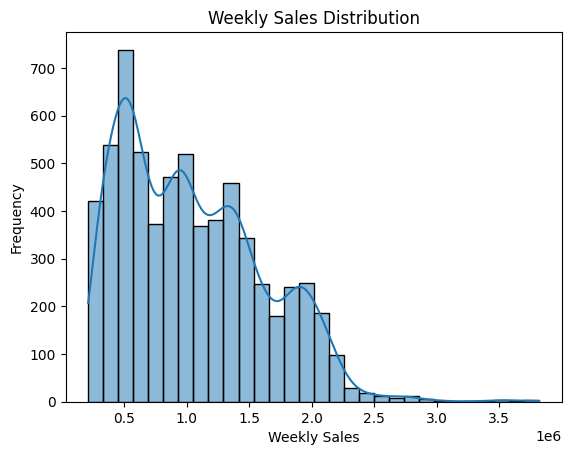

In [9]:
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


📈 Key Observations

1. Positive Skew / Right-Skewed Distribution

Most of the data is concentrated on the left side, under $1.5M.

The tail stretches to the right, going up to over $3.5M.

This confirms the positive skew seen in the descriptive statistics (mean > median).

2. Mode Cluster Around 0.5M

The highest peak (mode) is around $400K–$600K, meaning most store-weeks have weekly sales in that range.

3. Multiple Local Peaks

There are small bumps (multi-modality) around 1M and 1.5M as well, suggesting the presence of multiple clusters or store types (e.g., large-format stores vs. smaller stores).

4. Outliers / High-Performing Stores

The long right tail shows a few store-weeks with very high sales, going up to ~$3.8M.

These are the outliers or high-performing stores that skew the distribution.

🔹 Sales Trends Over Time (First Store)

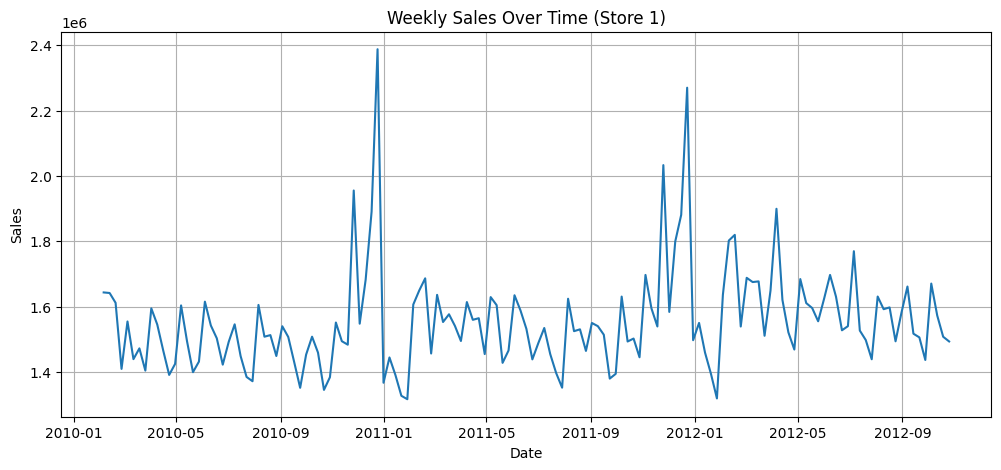

In [13]:
# Convert 'Date' column to datetime objects, specifying the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Select data for Store 1
store1 = df[df['Store'] == 1]

# Plot Weekly Sales Over Time for Store 1
store1 = df[df['Store'] == 1]
plt.figure(figsize=(12,5))
plt.plot(store1['Date'], store1['Weekly_Sales'])
plt.title("Weekly Sales Over Time (Store 1)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


📈 Key Observations

1. Seasonal Spikes

There are sharp peaks around:

Late 2010

Late 2011

Late 2012

These likely correspond to holiday seasons (e.g., Christmas, Thanksgiving, or Black Friday) where sales typically surge.

2. Baseline Weekly Sales Range

For most of the year, sales hover between $1.3M and $1.7M.

This is the normal range for Store 1.

3. Volatility

Sales show week-to-week fluctuations.

This could be due to:

Promotions or sales events.

Local holidays or weather impacts.

Inventory or staffing issues.

4. Outliers

A few spikes reach as high as $2.4M, far above the median weekly sales.

These are positive outliers and likely linked to national or store-specific promotions or events.

📉 Correlation Analysis

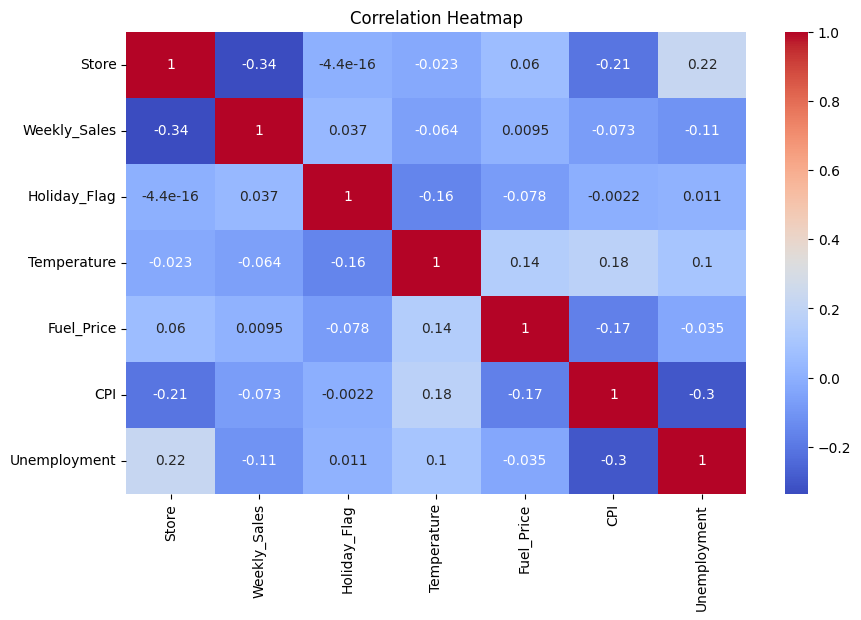

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


📌 Key Takeaways

🛍️ Weekly_Sales Correlations

Store:
-0.34 → Moderate negative correlation

→ Some stores perform consistently worse or better.

Holiday_Flag:

+0.037 → Very weak positive correlation

→ Sales are only slightly higher during holidays.

Temperature:

-0.064 → Weak negative correlation

→ Slight decrease in sales with higher/lower temperatures.

Fuel_Price:

+0.0095 → No real correlation

CPI:

-0.073 → Weak negative correlation

→ Higher consumer prices might slightly suppress sales.

Unemployment:

-0.11 → Slight negative correlation

→ As unemployment rises, sales tend to drop a little.

📦 Missing Values

In [12]:
df.isnull().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


## 🧹Data Cleaning

Data Cleaning Practice:


Data is sorted first by store number (ascending) and second by date (ascending)

Date is in the format MM-DD-YYYY

Weekly Sales is rounded to the nearest 2 decimal places


Temperature is rounded to the nearest whole number

Fuel Price is rounded to the nearest 2 decimal places

CPI is rounded to the nearest 3 decimal places

Unemployment is rounded to the nearest 3 decimal places

Ensure that there is no missing data


In [14]:
# Sort by Store and Date
df = df.sort_values(by=['Store', 'Date'], ascending=[True, True])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')
df[['Store', 'Date']].head()


,Store,Date
0,1,02-05-2010
1,1,02-12-2010
2,1,02-19-2010
3,1,02-26-2010
4,1,03-05-2010


In [16]:
df['Weekly_Sales'] = df['Weekly_Sales'].round(2)
df['Weekly_Sales'].head()


,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [17]:
df['Temperature'] = df['Temperature'].round(0).astype(int)
df['Temperature'].head()


,Temperature
0,42
1,39
2,40
3,47
4,46


In [18]:
df['Fuel_Price'] = df['Fuel_Price'].round(2)
df['Fuel_Price'].head()


,Fuel_Price
0,2.57
1,2.55
2,2.51
3,2.56
4,2.62


In [19]:
df['CPI'] = df['CPI'].round(3)
df['CPI'].head()


,CPI
0,211.096
1,211.242
2,211.289
3,211.320
4,211.350


In [20]:
df['Unemployment'] = df['Unemployment'].round(3)
df['Unemployment'].head()


,Unemployment
0,8.106
1,8.106
2,8.106
3,8.106
4,8.106


In [21]:
df.isnull().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


✅ Final Cleaned Data Preview

In [22]:
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42,2.57,211.096,8.106
1,1,02-12-2010,1641957.44,1,39,2.55,211.242,8.106
2,1,02-19-2010,1611968.17,0,40,2.51,211.289,8.106
3,1,02-26-2010,1409727.59,0,47,2.56,211.320,8.106
4,1,03-05-2010,1554806.68,0,46,2.62,211.350,8.106


##Another Example

In [5]:
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/AmesHousing.csv')

In [6]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [10]:
data.isnull().sum()


,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [11]:
pd.set_option('display.max_rows', None)


In [12]:
data.isnull().sum()


,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
Lot Area,0
Street,0
Alley,2732
Lot Shape,0
Land Contour,0


In [13]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)


Order               0.000000
PID                 0.000000
MS SubClass         0.000000
MS Zoning           0.000000
Lot Frontage       16.723549
Lot Area            0.000000
Street              0.000000
Alley              93.242321
Lot Shape           0.000000
Land Contour        0.000000
Utilities           0.000000
Lot Config          0.000000
Land Slope          0.000000
Neighborhood        0.000000
Condition 1         0.000000
Condition 2         0.000000
Bldg Type           0.000000
House Style         0.000000
Overall Qual        0.000000
Overall Cond        0.000000
Year Built          0.000000
Year Remod/Add      0.000000
Roof Style          0.000000
Roof Matl           0.000000
Exterior 1st        0.000000
Exterior 2nd        0.000000
Mas Vnr Type       60.580205
Mas Vnr Area        0.784983
Exter Qual          0.000000
Exter Cond          0.000000
Foundation          0.000000
Bsmt Qual           2.730375
Bsmt Cond           2.730375
Bsmt Exposure       2.832765
BsmtFin Type 1

In [14]:
missing_value_column = missing_value_percent[missing_value_percent > 16].keys()
print(missing_value_column)


Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC',
       'Fence', 'Misc Feature'],
      dtype='object')


In [15]:
data1 = data.drop(columns = missing_value_column)


In [16]:
data1.shape

(2930, 75)

In [17]:
data2 = data1.dropna() # deleting missing value rows.


In [18]:
data2.shape


(2678, 75)

In [19]:
data2.isnull().sum().sum()

0